## 다변수 확률변수

- 변수가 여러개일 때 분포를 알아보고 연관된 분포 혹은 결과값들을 알아봅시다.
- 변수가 여러개가 되면 확률분포가 결합되어 결합확률분포함수라고 합니다.
- 두 개의 확률변수 값의 결합확률분포를 알고 있을 때 두 개 중에 하나의 확률분포를 알고 있으면 나머지 하나의 확률분포도 알 수 있다.



### 이산 데이터

- X, Y의 확률질량함수
      X확률질량함수 = px(x) 
      Y의 확률질량함수 = px(y)
      결합 확률 질량함수 = pxy(x,y)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import koreanize_matplotlib
import numpy as np
import scipy as sp

In [2]:
# 영어, 수학
grades = ['A','B','C','D','E','F']
scores = pd.DataFrame(
    [
        [1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]
    ],
    columns = grades, index=grades
)
scores.index.name = '수학'
scores.columns.name = '영어'
scores

영어,A,B,C,D,E,F
수학,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [3]:
scores.values.sum()

50

In [4]:
scores/scores.values.sum()

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


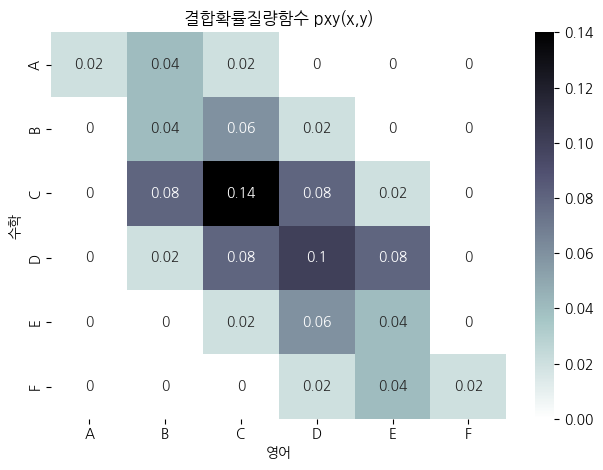

In [5]:
pmf = scores/scores.values.sum()
sns.heatmap(pmf, annot=True, cmap=mpl.cm.bone_r, xticklabels=grades, yticklabels=grades)
plt.title("결합확률질량함수 pxy(x,y)")
plt.tight_layout()
plt.show()

## 주변확률질량함수

결합확률 질량함수에서 단변수 확률질량함수를 구하는 것

$${px}(x) = \Sigma {pxy}(x,{y_i})$$

$${py}(y) = \Sigma {pxy}({x_i},y)$$

In [6]:
pmf

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [7]:
# 확률질량함수
x_english = pmf.sum()

In [8]:
y_math = pmf.sum(axis=1)[:,np.newaxis]

C:\Users\user\AppData\Local\Temp\ipykernel_41772\1205368220.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_math = pmf.sum(axis=1)[:,np.newaxis]


In [9]:
y_math

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

## 조건부확률질량함수

X,Y 변수 중 하나의 변수가 특정 값으로 고정되는 경우 나머지 하나의 변수의 확률질량함수를 구하는것

$$PX|Y(x|y)=\frac{PXY(x,y)}{PY(y)}$$

$$PY|X(y|x)=\frac{PXY(x,y)}{PX(x)}$$

In [10]:
import string
string.ascii_uppercase[:6]

'ABCDEF'

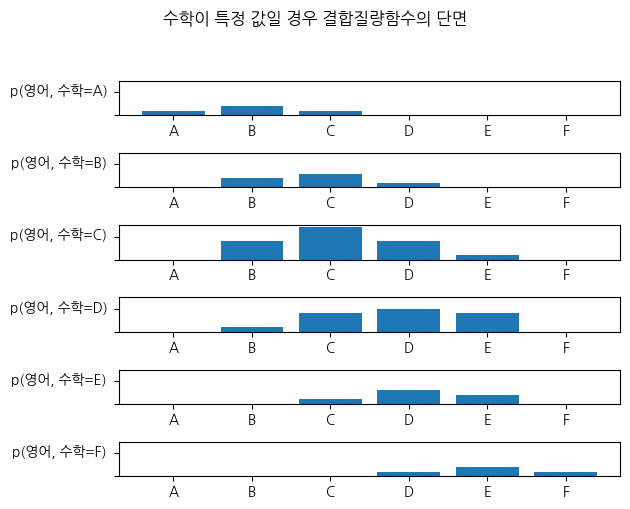

In [11]:
grades = ['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf.iloc[i,:])
  plt.ylabel(f'p(영어, 수학={y})', rotation=0, labelpad=40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('수학이 특정 값일 경우 결합질량함수의 단면', y = 1.05)
plt.tight_layout()
plt.show()

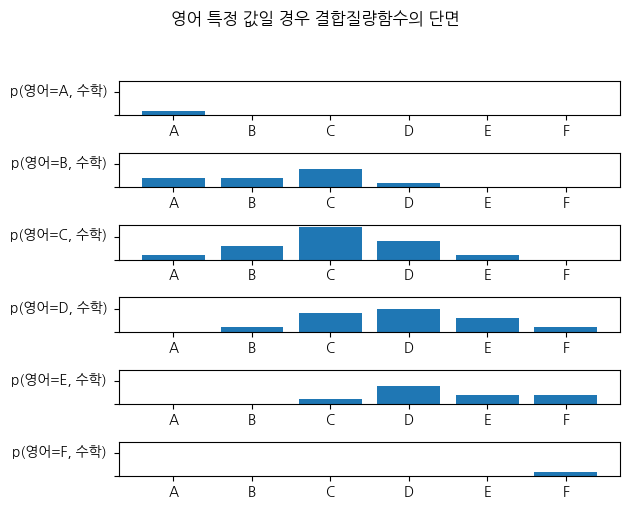

In [12]:
grades = ['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf[y])
  plt.ylabel(f'p(영어={y}, 수학)', rotation=0, labelpad=40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('영어 특정 값일 경우 결합질량함수의 단면', y = 1.05)
plt.tight_layout()
plt.show()

## 다변수 연속활률 변수

### 결합누적확률분포함수
이산확률분포처럼 단순사건을 이용할 수 없음(A,B,C,D)   
키, 몸무게, 속도, 시간, 온도   
CDF -> 미분 -> PDF   
결합누적확률분포함수 -> 미분 -> 결합확률밀도함수

$${F_{XY}} = P({X<x, Y<y})$$

- 특성
$${F_{XY}}(-∞, ∞) = 1$$
$${F_{XY}}(-∞, y) = {F_{XY}}(x, ∞) = 0$$

### 결합확률 밀도 함수
결합누적확률분포함수를 미분해서 정의

$${P_{XY}}(x,y)$$

- 특성
      적분하면 1
$$ ∫∫{P_{XY}}(x,y)dxdy = 1 $$


In [13]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]
'''
공분산 행렬 : [
  [분산, 공분산],
  [공분산, 분산]]
]
'''
rv = sp.stats.multivariate_normal(mu, cov)
x, y = np.linspace(20, 120, 100), np.linspace(100, 250, 100)

In [14]:
xm, ym = np.meshgrid(x,y)
z = rv.pdf(np.dstack([xm, ym]))

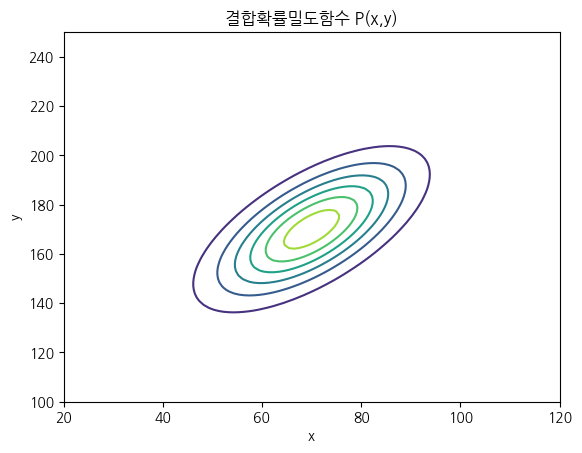

In [15]:
plt.contour(x,y,z)
plt.xlabel('x')
plt.ylabel('y')
plt.title('결합확률밀도함수 P(x,y)')
plt.show()

### 주변확률밀도함수
- 주변확률밀도 함수는 하나의 변수를 가중평균을 하고 나머지 하나의 변수에 대해서 확률밀도함수를 구하는 것   
- 주변확률밀도함수는 결합확률 밀도 함수를 통해 단일변수의 확률밀도함수를 구하는 것

$${P_X}(x) = ∫{P_{XY}}(x,y)dy$$
$${P_Y}(y) = ∫{P_{XY}}(x,y)dx$$

In [16]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps

mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 100)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

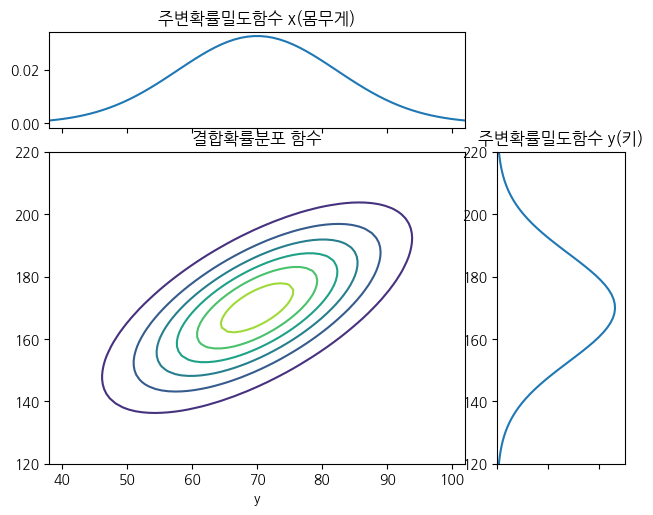

In [17]:
fx = [simps(z1, y) for z1 in z.T]
fy = [simps(z1, x) for z1 in z]

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.xaxis.set_major_formatter(NullFormatter())

ax1.contour(xm, ym, z)
ax1.set_title('결합확률분포 함수')
ax1.set_xlabel('x')
ax1.set_xlabel('y')

ax2.plot(x, fx)
ax2.set_title('주변확률밀도함수 x(몸무게)')

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-y, fy, transform=rot+base)
plt.title('주변확률밀도함수 y(키)')

ax1.set_xlim(38, 102)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)

ax1.set_ylim(120, 220)
ax3.set_ylim(120, 220)

plt.show()

### 조건부 확률 밀도함수
다 변수 확률 변수 중에 하나가 특정한 값일 경우 나머지 확률밀도함수를 조건부 확률 밀도함수

$${P_{X|Y}}(x|y)=\frac{P_{XY}(x,y)}{P_Y(y)}$$

$${P_{Y|X}}(y|x)=\frac{P_{XY}(x,y)}{P_X(x)}$$

AttributeError: 'AxesSubplot' object has no attribute 'add_collection3d'

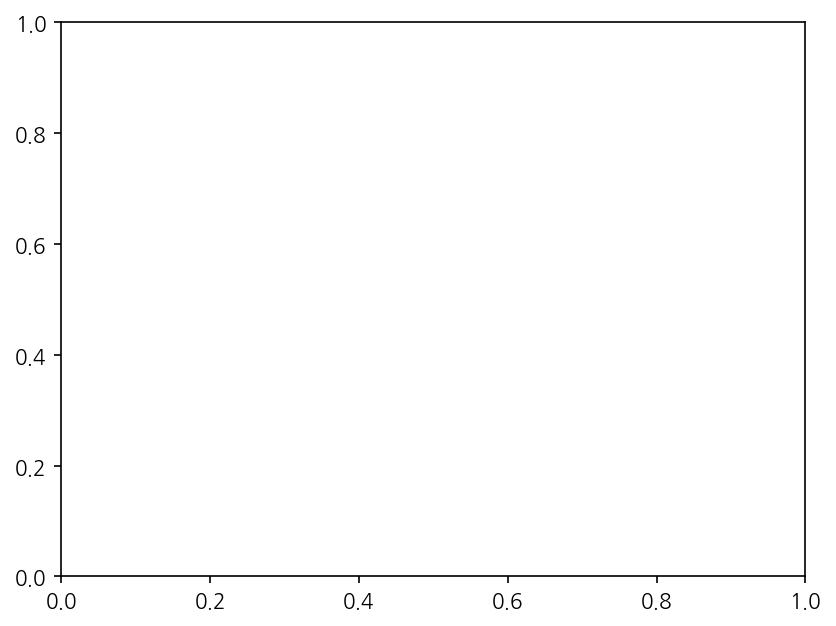

In [23]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 16)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, x, 0])
zs = np.zeros_like(xs)
verts = []

for i, y1 in enumerate(y):
  zs[1:-1] = z[i]
  verts.append(list(zip(x,zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=y, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20,120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0,0.0007)
ax.view_init(50,-50)
plt.title('결합확률밀도함수의 단면')
plt.show()

UsageError: %%python is a cell magic, but the cell body is empty.
